# BigBasket Analysis
## We will do a EDA for this dataset
### Hope u enjoy my notebook here (:

## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set(rc={'figure.figsize':[6, 6]}, font_scale = 1.2)

## Import dataset

In [2]:
df = pd.read_csv('../input/bigbasket-entire-product-list-28k-datapoints/BigBasket Products.csv')
df.head()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


## Explore dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         27555 non-null  int64  
 1   product       27554 non-null  object 
 2   category      27555 non-null  object 
 3   sub_category  27555 non-null  object 
 4   brand         27554 non-null  object 
 5   sale_price    27555 non-null  float64
 6   market_price  27555 non-null  float64
 7   type          27555 non-null  object 
 8   rating        18929 non-null  float64
 9   description   27440 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 2.1+ MB


**Notes:**
* There is no problems in dtype of features all is good.
* There is a missing values in rating feature.
* We can generate new feature calculated from sale_price and market_price which is discount.

## Data Analysis
**Questions to Answer:**
1. Top 10 sold products ?!
2. Least 10 sold products ?!
3. Which category sales more as a count and profit ?!
4. Which products have >= 4 ratting and it's categories ?!
5. There are 2 types of products (discounted products - original price products):
        5.1. What is count percentage between both of them ?!
        5.2. What is profit percentage between both of them ?!
6. Is there a relationship between ratting and sale_price ?!

**Let's dive through it..!**

## 1. Top 10 sold products ?!

In [4]:
top_10 = pd.DataFrame(df[['product', 'category']].value_counts().head(10)).reset_index()
top_10.columns = ['product', 'category', 'count']
top_10

,product,category,count
0,Turmeric Powder/Arisina Pudi,"Foodgrains, Oil & Masala",26
1,Extra Virgin Olive Oil,Gourmet & World Food,14
2,Cow Ghee/Tuppa,"Foodgrains, Oil & Masala",14
3,Soft Drink,Beverages,12
4,Colorsilk Hair Colour With Keratin,Beauty & Hygiene,12
5,Coriander Powder,"Foodgrains, Oil & Masala",11
6,Ghee/Tuppa,"Foodgrains, Oil & Masala",11
7,Powder - Coriander,"Foodgrains, Oil & Masala",11
8,Olive Oil - Extra Virgin,Gourmet & World Food,11
9,Hand Sanitizer,Beauty & Hygiene,10


In [5]:
import textwrap
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

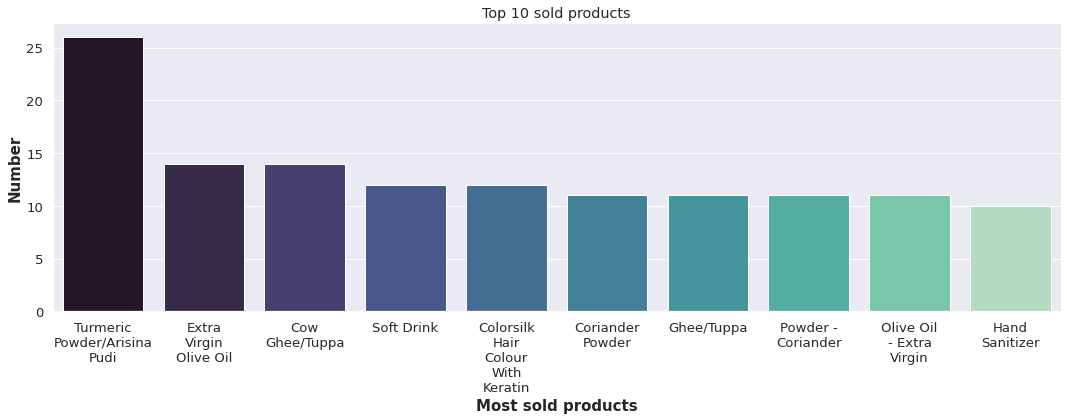

In [6]:
fig = plt.figure(figsize=(14,4))
ax = fig.add_axes([0,0,1,1])
sns.barplot(data = top_10, x = 'product', y = 'count', palette='mako')
plt.title('Top 10 sold products')
ax.set_xlabel("Most sold products",fontsize=15, weight='semibold')
ax.set_ylabel("Number",fontsize=15, weight='semibold')
wrap_labels(ax, 10)

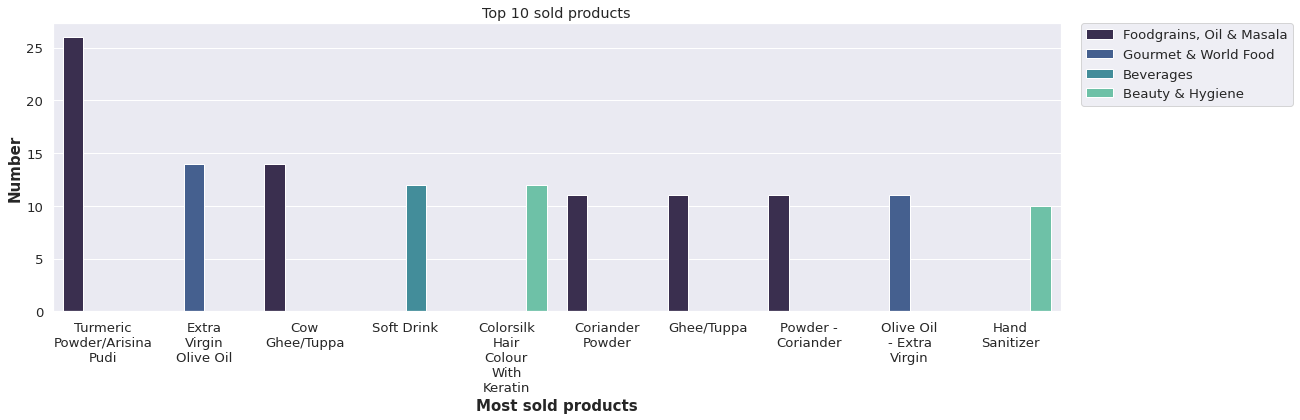

In [7]:
fig = plt.figure(figsize=(14,4))
ax = fig.add_axes([0,0,1,1])
sns.barplot(data = top_10, x = 'product', y = 'count', hue = 'category', palette='mako')
plt.title('Top 10 sold products')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
ax.set_xlabel("Most sold products",fontsize=15, weight='semibold')
ax.set_ylabel("Number",fontsize=15, weight='semibold')
wrap_labels(ax, 10)

**Notes:**
> As we see from above analysis that bigbasket supermarket customers have interest in **Foodgrains, Oil & Masala** category.
> **Turmeric** is most sold product as it's on **Foodgrains, Oil & Masala** we can expect that indian is interest with haircare.

## 2. Least 10 sold products ?!

In [8]:
least_10 = pd.DataFrame(df[['product', 'category']].value_counts().tail(10)).reset_index()
least_10.columns = ['product', 'category', 'count']
least_10

,product,category,count
0,Geometry Box - Kidzz,Cleaning & Household,1
1,Geometry Box - Invento,Cleaning & Household,1
2,Geometry Box - Export,Cleaning & Household,1
3,"Geometry Box - Disney, Invento",Cleaning & Household,1
4,Geometry Box - Asteroid,Cleaning & Household,1
5,Geometry Box - Archimedes,Cleaning & Household,1
6,Genuine Wood Shaving Brush,Beauty & Hygiene,1
7,Gentleman Urbane Deodorant,Beauty & Hygiene,1
8,Gentleman Urbane - Eau De Parfum For Men,Beauty & Hygiene,1
9,pasta shell,Snacks & Branded Foods,1


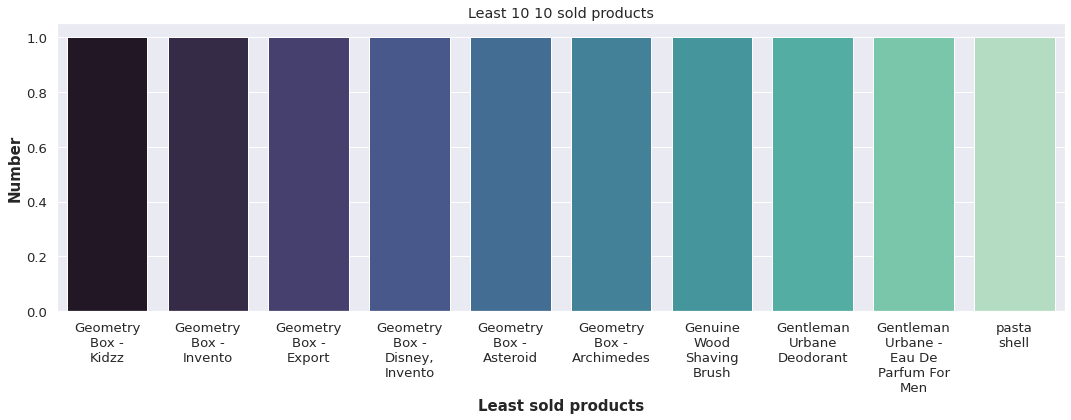

In [9]:
fig = plt.figure(figsize=(14,4))
ax = fig.add_axes([0,0,1,1])
sns.barplot(data = least_10, x = 'product', y = 'count', palette='mako')
plt.title('Least 10 10 sold products')
ax.set_xlabel("Least sold products",fontsize=15, weight='semibold')
ax.set_ylabel("Number",fontsize=15, weight='semibold')
wrap_labels(ax, 10)

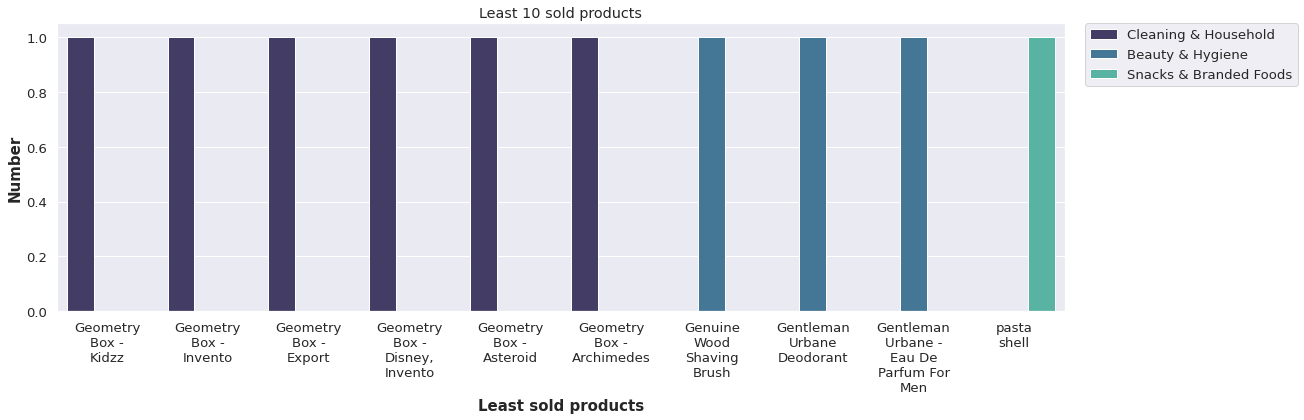

In [10]:
fig = plt.figure(figsize=(14,4))
ax = fig.add_axes([0,0,1,1])
sns.barplot(data = least_10, x = 'product', y = 'count', hue = 'category', palette='mako')
plt.title('Least 10 sold products')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
ax.set_xlabel("Least sold products",fontsize=15, weight='semibold')
ax.set_ylabel("Number",fontsize=15, weight='semibold')
wrap_labels(ax, 10)

**Notes:**
> As we see least sold products is in **Cleaning & Household, Beatuy & Hygiene, and Snacks & Branded Foods**.

## 3. Which category sales more as a count and profit ?!

In [11]:
df['category'].unique()

array(['Beauty & Hygiene', 'Kitchen, Garden & Pets',
       'Cleaning & Household', 'Gourmet & World Food',
       'Foodgrains, Oil & Masala', 'Snacks & Branded Foods', 'Beverages',
       'Bakery, Cakes & Dairy', 'Baby Care', 'Fruits & Vegetables',
       'Eggs, Meat & Fish'], dtype=object)

In [12]:
df['category'].value_counts()

Beauty & Hygiene            7867
Gourmet & World Food        4690
Kitchen, Garden & Pets      3580
Snacks & Branded Foods      2814
Foodgrains, Oil & Masala    2676
Cleaning & Household        2675
Beverages                    885
Bakery, Cakes & Dairy        851
Baby Care                    610
Fruits & Vegetables          557
Eggs, Meat & Fish            350
Name: category, dtype: int64

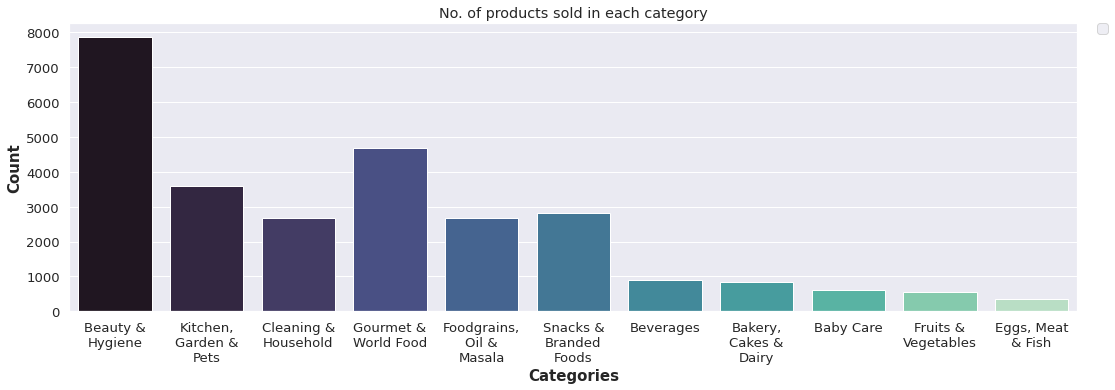

In [13]:
fig = plt.figure(figsize=(14,4))
ax = fig.add_axes([0,0,1,1])
sns.countplot(data = df, x = 'category', palette='mako')
plt.title('No. of products sold in each category')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
ax.set_xlabel("Categories",fontsize=15, weight='semibold')
ax.set_ylabel("Count",fontsize=15, weight='semibold')
wrap_labels(ax, 10)

**Notes:**
> As we see the most sold products from **Beauty & Hygiene** category and that seems the interest of indians. 
> **Eggs, Meat & Fish** category has the least sold products that may indicate to low quality of these products.

In [14]:
data = pd.DataFrame(df.groupby('category')['sale_price'].sum()).reset_index()
data.columns = ['category', 'profit']
data

,category,profit
0,Baby Care,326317.17
1,"Bakery, Cakes & Dairy",121525.14
2,Beauty & Hygiene,3293749.24
3,Beverages,212186.67
4,Cleaning & Household,605013.09
5,"Eggs, Meat & Fish",101114.12
6,"Foodgrains, Oil & Masala",516916.23
7,Fruits & Vegetables,28345.36
8,Gourmet & World Food,1500115.31
9,"Kitchen, Garden & Pets",1816938.12


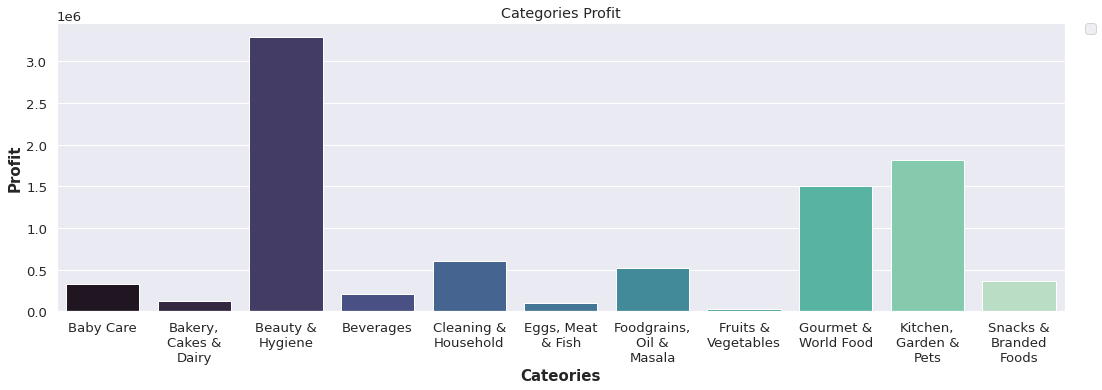

In [15]:
fig = plt.figure(figsize=(14,4))
ax = fig.add_axes([0,0,1,1])
sns.barplot(data = data, x = 'category', y = 'profit', palette='mako')
plt.title('Categories Profit')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
ax.set_xlabel("Cateories",fontsize=15, weight='semibold')
ax.set_ylabel("Profit",fontsize=15, weight='semibold')
wrap_labels(ax, 10)

**Notes:**
> As **Beauty & Hygiene** category product's was sold a lot, it's profit is so big. And still **Eggs, Meat & Fish** is least profit as well.

## 4. Which products have >= 4 ratting and it's categories ?!

In [16]:
data = df[df['rating'] >= 4]
data

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.00,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.00,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...
7,8,Hand Sanitizer - 70% Alcohol Base,Beauty & Hygiene,Bath & Hand Wash,Bionova,250.00,250.0,Hand Wash & Sanitizers,4.0,70%Alcohol based is gentle of hand leaves skin...
9,10,"Scrub Pad - Anti- Bacterial, Regular",Cleaning & Household,"Mops, Brushes & Scrubs",Scotch brite,20.00,20.0,"Utensil Scrub-Pad, Glove",4.3,Scotch Brite Anti- Bacterial Scrub Pad thoroug...
10,11,Wheat Grass Powder - Raw,Gourmet & World Food,Cooking & Baking Needs,NUTRASHIL,261.00,290.0,Flours & Pre-Mixes,4.0,Wheatgrass is a superfood potent health food w...
...,...,...,...,...,...,...,...,...,...,...
27548,27549,Apple Cider Vinegar Shampoo,Beauty & Hygiene,Hair Care,Morpheme Remedies,499.00,499.0,Shampoo & Conditioner,5.0,"Say no to dull, lifeless, dry and damaged hair..."
27549,27550,Papad - Garlic Disco,Snacks & Branded Foods,Ready To Cook & Eat,Atish,61.00,61.0,"Papads, Ready To Fry",4.0,Papads are prepared from urad dal flour and sp...
27551,27552,Rosemary,Gourmet & World Food,Cooking & Baking Needs,Puramate,67.50,75.0,"Herbs, Seasonings & Rubs",4.0,Puramate rosemary is enough to transform a dis...
27553,27554,Green Tea - Pure Original,Beverages,Tea,Tetley,396.00,495.0,Tea Bags,4.2,"Tetley Green Tea with its refreshing pure, ori..."


## 5.1. What is count percentage between discounted products and original sale price products ?!

### First we need to determine discounted products in our dataset

In [17]:
def is_discount_product(data):
    return ((data['market_price'] - data['sale_price']) != 0)

df['is_discount_product'] = df[['sale_price', 'market_price']].apply(is_discount_product, axis = 1)
df

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description,is_discount_product
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.00,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...,False
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.00,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ...",False
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.00,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m...",True
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.00,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...,True
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.00,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...,False
...,...,...,...,...,...,...,...,...,...,...,...
27550,27551,"Wottagirl! Perfume Spray - Heaven, Classic",Beauty & Hygiene,Fragrances & Deos,Layerr,199.20,249.0,Perfume,3.9,Layerr brings you Wottagirl Classic fragrant b...,True
27551,27552,Rosemary,Gourmet & World Food,Cooking & Baking Needs,Puramate,67.50,75.0,"Herbs, Seasonings & Rubs",4.0,Puramate rosemary is enough to transform a dis...,True
27552,27553,Peri-Peri Sweet Potato Chips,Gourmet & World Food,"Snacks, Dry Fruits, Nuts",FabBox,200.00,200.0,Nachos & Chips,3.8,We have taken the richness of Sweet Potatoes (...,False
27553,27554,Green Tea - Pure Original,Beverages,Tea,Tetley,396.00,495.0,Tea Bags,4.2,"Tetley Green Tea with its refreshing pure, ori...",True


In [18]:
df['is_discount_product'].value_counts()

True     15229
False    12326
Name: is_discount_product, dtype: int64

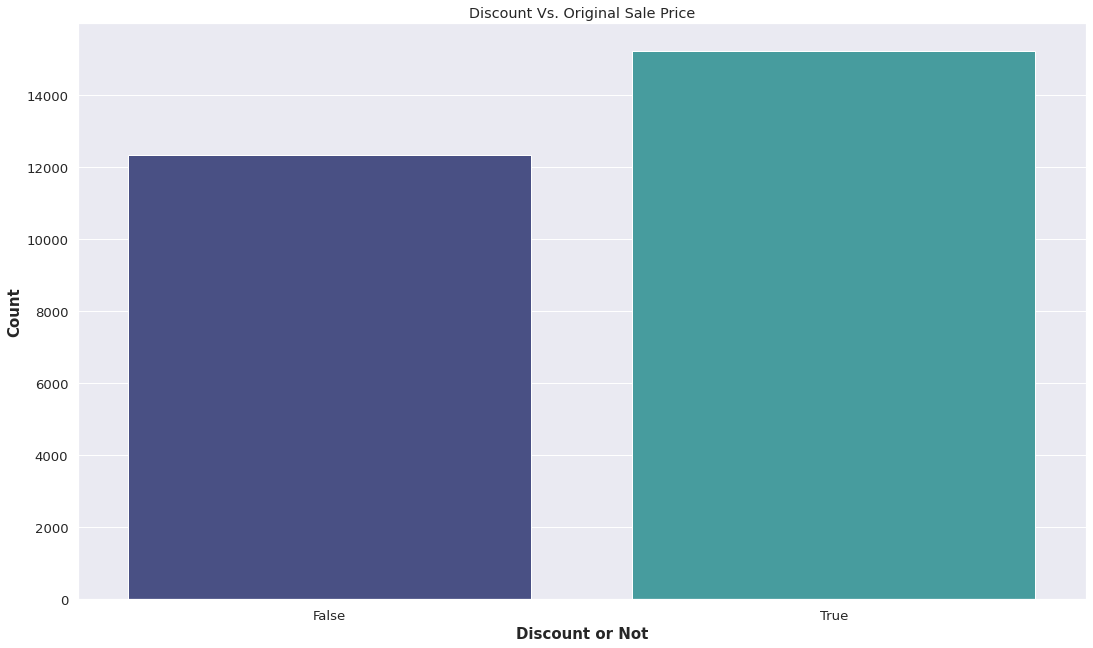

In [19]:
fig = plt.figure(figsize=(14,8))
ax = fig.add_axes([0,0,1,1])
sns.countplot(data = df, x = 'is_discount_product', palette='mako')
plt.title('Discount Vs. Original Sale Price')
ax.set_xlabel("Discount or Not",fontsize=15, weight='semibold')
ax.set_ylabel("Count",fontsize=15, weight='semibold')
wrap_labels(ax, 10)

**Note:**
> As we see the percentage of **discount products** is more than **original products** sale price.

## 5.2. What is profit percentage discounted products and original sale price products ?!

### As we already created **is_discount_product** feature we start coding.

In [20]:
df.groupby('is_discount_product').describe()['sale_price'].T

is_discount_product,False,True
count,12326.000000,15229.000000
mean,316.000840,327.787063
std,503.230414,472.034699
min,3.000000,2.450000
25%,89.000000,99.000000
50%,190.000000,191.040000
75%,350.000000,362.360000
max,12500.000000,8184.440000


In [21]:
data = pd.DataFrame(df.groupby('is_discount_product')['sale_price'].sum()).reset_index()
data.columns = ['is_discount_product', 'profit']
data

,is_discount_product,profit
0,False,3895026.35
1,True,4991869.18


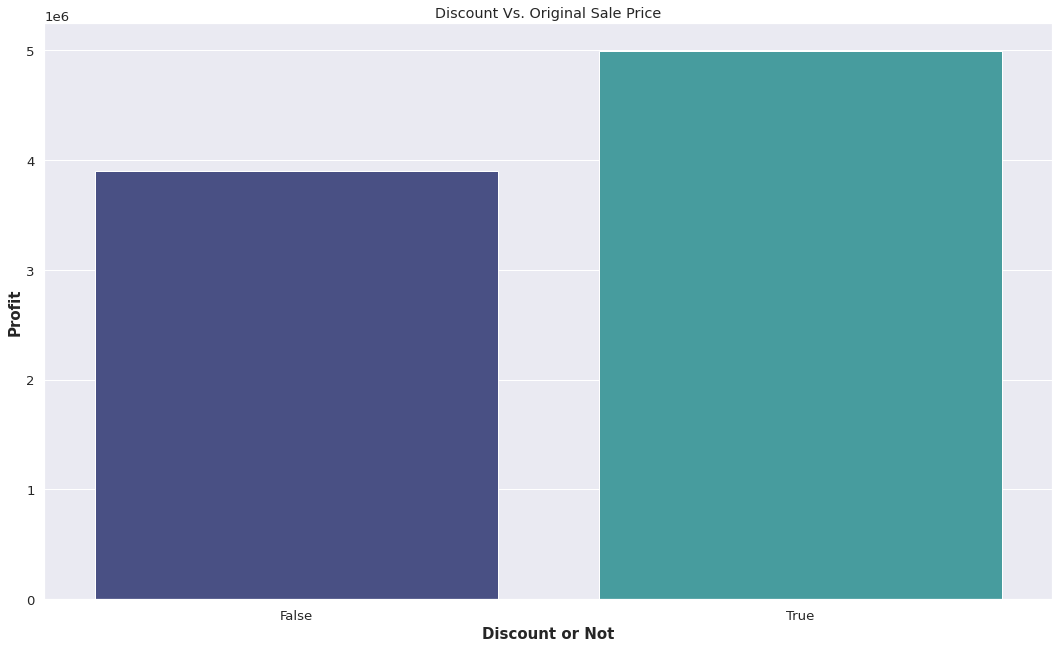

In [22]:
fig = plt.figure(figsize=(14,8))
ax = fig.add_axes([0,0,1,1])
sns.barplot(data = data, x = 'is_discount_product', y = 'profit', palette='mako')
plt.title('Discount Vs. Original Sale Price')
ax.set_xlabel("Discount or Not",fontsize=15, weight='semibold')
ax.set_ylabel("Profit",fontsize=15, weight='semibold')
wrap_labels(ax, 10)

**Note:**
> **Discount Products** gives much more money than **Original Products** sale price so we may need to expand offers in other products. 
> * And from that we can tell that there is a relationship between discount on products and total profit.

## 6. Is there a relationship between ratting and sale_price ?!


In [23]:
discount_data = df[df['is_discount_product'] == True]
discount_data

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description,is_discount_product
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.00,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m...",True
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.00,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...,True
5,6,Germ - Removal Multipurpose Wipes,Cleaning & Household,All Purpose Cleaners,Nature Protect,169.00,199.0,Disinfectant Spray & Cleaners,3.3,Stay protected from contamination with Multipu...,True
10,11,Wheat Grass Powder - Raw,Gourmet & World Food,Cooking & Baking Needs,NUTRASHIL,261.00,290.0,Flours & Pre-Mixes,4.0,Wheatgrass is a superfood potent health food w...,True
15,16,Dove Plastic Soap Case - Assorted Colour,Cleaning & Household,Bins & Bathroom Ware,Nakoda,49.00,59.0,Soap Cases & Dispensers,4.0,This soap case is made of virgin plastic which...,True
...,...,...,...,...,...,...,...,...,...,...,...
27546,27547,Organic Powder - Garam Masala,"Foodgrains, Oil & Masala",Organic Staples,Organic Tattva,152.00,160.0,Organic Masalas & Spices,4.2,Organic Tattva Garam masala is a famous spice ...,True
27550,27551,"Wottagirl! Perfume Spray - Heaven, Classic",Beauty & Hygiene,Fragrances & Deos,Layerr,199.20,249.0,Perfume,3.9,Layerr brings you Wottagirl Classic fragrant b...,True
27551,27552,Rosemary,Gourmet & World Food,Cooking & Baking Needs,Puramate,67.50,75.0,"Herbs, Seasonings & Rubs",4.0,Puramate rosemary is enough to transform a dis...,True
27553,27554,Green Tea - Pure Original,Beverages,Tea,Tetley,396.00,495.0,Tea Bags,4.2,"Tetley Green Tea with its refreshing pure, ori...",True


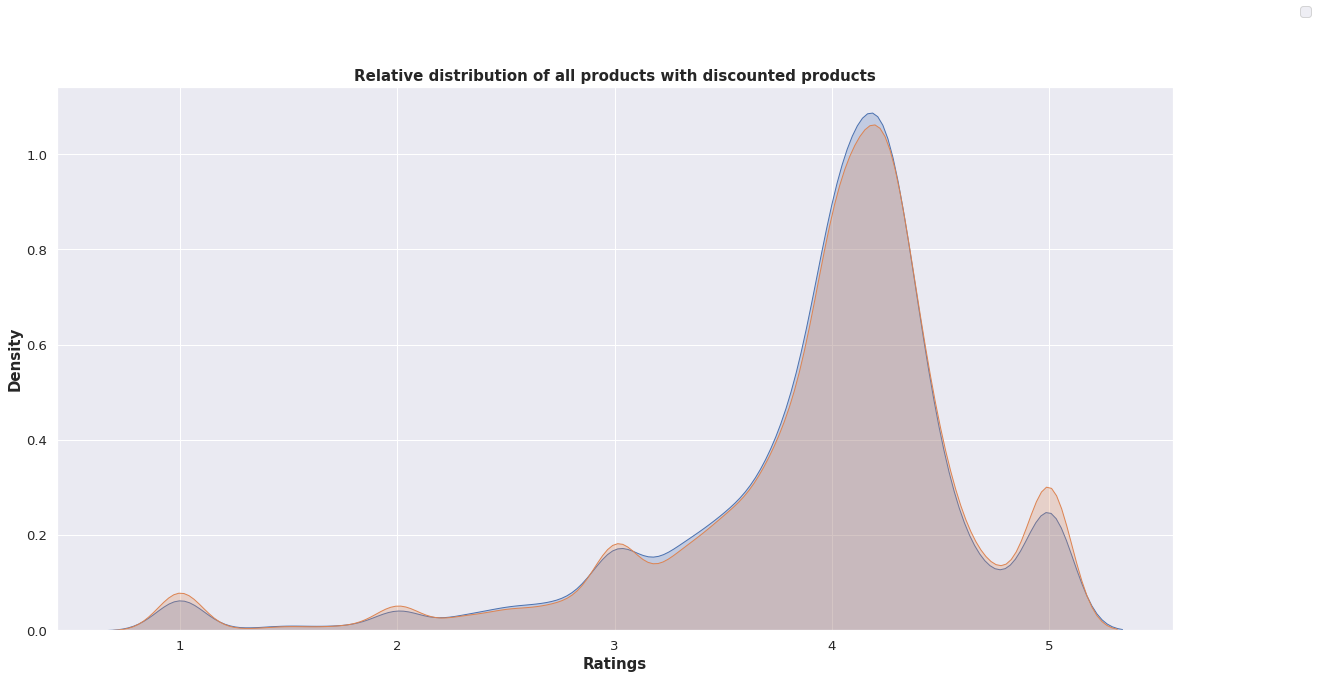

In [24]:
fig = plt.figure(figsize=(20,10))

sns.kdeplot(discount_data['rating'], shade=True)
sns.kdeplot(df['rating'], shade =True)
plt.xlabel("Ratings",fontsize=15, weight='semibold')
plt.ylabel("Density",fontsize=15, weight='semibold')
plt.title("Relative distribution of all products with discounted products",fontsize=15, weight='semibold')
fig.legend()

**Notes:**
> As we see from this graph **blue shade** represents discounts products, and **brown shade** represents non-discounts products:
> * From that we saw that in rating **(3.0 to 4.5)** it's products have little increase in selling.
> * Even in rating **(4.6 to 5)** there is a little increase in selling in original sale_price.

## Hope u enjoyed my notebook !
## If u like it, pls give me an upvote and leave a comment (:
### Happy Analysis, It was AmrBoghdady..!